In [2]:
import h5py
import numpy as np


#filepath = r'C:\Users\justi\Documents\GitHub\justinvision\NaturalImagesV1V2\natImRateData.mat'
filepath = 'natImRateData.mat'

f = h5py.File(filepath, 'r')

block_ref = f['natImRateData']['block'][0,0]
block = f[block_ref]
test_rates = block['testRates']
n_reps              = test_rates.shape[0]
split_half_size     = n_reps // 2

n_units = test_rates.shape[2]

# Split-half reliability for both the 100/100 and 100/0 data
def corrcoef_along_axis(x, y):
    # x, y shape: (trials, units)
    xm = x - x.mean(axis=0)
    ym = y - y.mean(axis=0)
    r_num = np.sum(xm * ym, axis=0)
    r_den = np.sqrt(np.sum(xm**2, axis=0) * np.sum(ym**2, axis=0))
    with np.errstate(divide='ignore', invalid='ignore'):
        r = r_num / r_den
    r[r_den == 0] = np.nan  # handle zero variance
    return r


n_corr_reps = 100

n_blocks = 2
sample_correlations = np.zeros((n_units, n_blocks, n_corr_reps))  # shape (units, blocks, repetitions)
for block_ind in range(n_blocks):
    block_ref = f['natImRateData']['block'][block_ind,0]
    block = f[block_ref]
    test_rates = block['testRates']
    n_reps              = test_rates.shape[0]
    split_half_size     = n_reps // 2

    print(test_rates.shape)
    n_units = test_rates.shape[2]

    
    for corr_rep_ind in range(n_corr_reps):

        sample_ind          = np.sort(np.random.choice(n_reps, split_half_size*2, replace=False).reshape(2, split_half_size),axis=1)


        sample_mean_rates = np.zeros((sample_ind.shape[0], test_rates.shape[1], test_rates.shape[2]))
        for group_i in range(sample_ind.shape[0]):
            # Select reps indices for this group
            indices = sample_ind[group_i,:]
            # Take mean across those reps (axis=1 in test_rates)
            sample_mean_rates[group_i] = np.mean(test_rates[indices, :, :], axis=0)

        group1 = sample_mean_rates[0]  # shape (trials, units)
        group2 = sample_mean_rates[1]
        sample_correlations[:,block_ind, corr_rep_ind] = corrcoef_along_axis(group1, group2)
        if np.mod(corr_rep_ind, 10) == 9:
            print(f"Block {block_ind+1}, Processed {corr_rep_ind+1} repetitions")


mean_correlations = np.mean(sample_correlations, axis=2)









# Split half reliability for a smaller set of reps (10 - matched with the 100 ms ISI block)

block_ind = 0
block_ref = f['natImRateData']['block'][block_ind,0]
block = f[block_ref]
test_rates = block['testRates']
n_reps              = test_rates.shape[0]
split_half_size     = n_reps // 2


target_split_size = split_half_size

print([n_reps, split_half_size])

block_ind = 1
block_ref = f['natImRateData']['block'][block_ind,0]
block = f[block_ref]
test_rates = block['testRates']
n_reps              = test_rates.shape[0]

n_units = test_rates.shape[2]

sample_match_correlations = np.zeros((n_units, 1, n_corr_reps))  # shape (units, blocks, repetitions)
for corr_rep_ind in range(n_corr_reps):

    sample_ind          = np.sort(np.random.choice(n_reps, target_split_size*2, replace=False).reshape(2, target_split_size),axis=1)


    sample_mean_rates = np.zeros((sample_ind.shape[0], test_rates.shape[1], test_rates.shape[2]))
    for group_i in range(sample_ind.shape[0]):
        # Select reps indices for this group
        indices = sample_ind[group_i,:]
        # Take mean across those reps (axis=1 in test_rates)
        sample_mean_rates[group_i] = np.mean(test_rates[indices, :, :], axis=0)

    group1 = sample_mean_rates[0]  # shape (trials, units)
    group2 = sample_mean_rates[1]
    sample_match_correlations[:,0, corr_rep_ind] = corrcoef_along_axis(group1, group2)
    if np.mod(corr_rep_ind, 10) == 9:
        print(f"Block {block_ind+1}, Processed {corr_rep_ind+1} repetitions")

mean_match_correlations = np.mean(sample_match_correlations, axis=2)

(20, 200, 1262)
Block 1, Processed 10 repetitions
Block 1, Processed 20 repetitions
Block 1, Processed 30 repetitions
Block 1, Processed 40 repetitions
Block 1, Processed 50 repetitions
Block 1, Processed 60 repetitions
Block 1, Processed 70 repetitions
Block 1, Processed 80 repetitions
Block 1, Processed 90 repetitions
Block 1, Processed 100 repetitions
(40, 200, 1262)
Block 2, Processed 10 repetitions
Block 2, Processed 20 repetitions
Block 2, Processed 30 repetitions
Block 2, Processed 40 repetitions
Block 2, Processed 50 repetitions
Block 2, Processed 60 repetitions
Block 2, Processed 70 repetitions
Block 2, Processed 80 repetitions
Block 2, Processed 90 repetitions
Block 2, Processed 100 repetitions
[20, 10]
Block 2, Processed 10 repetitions
Block 2, Processed 20 repetitions
Block 2, Processed 30 repetitions
Block 2, Processed 40 repetitions
Block 2, Processed 50 repetitions
Block 2, Processed 60 repetitions
Block 2, Processed 70 repetitions
Block 2, Processed 80 repetitions
Block

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

(1262,)
(1262,)


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

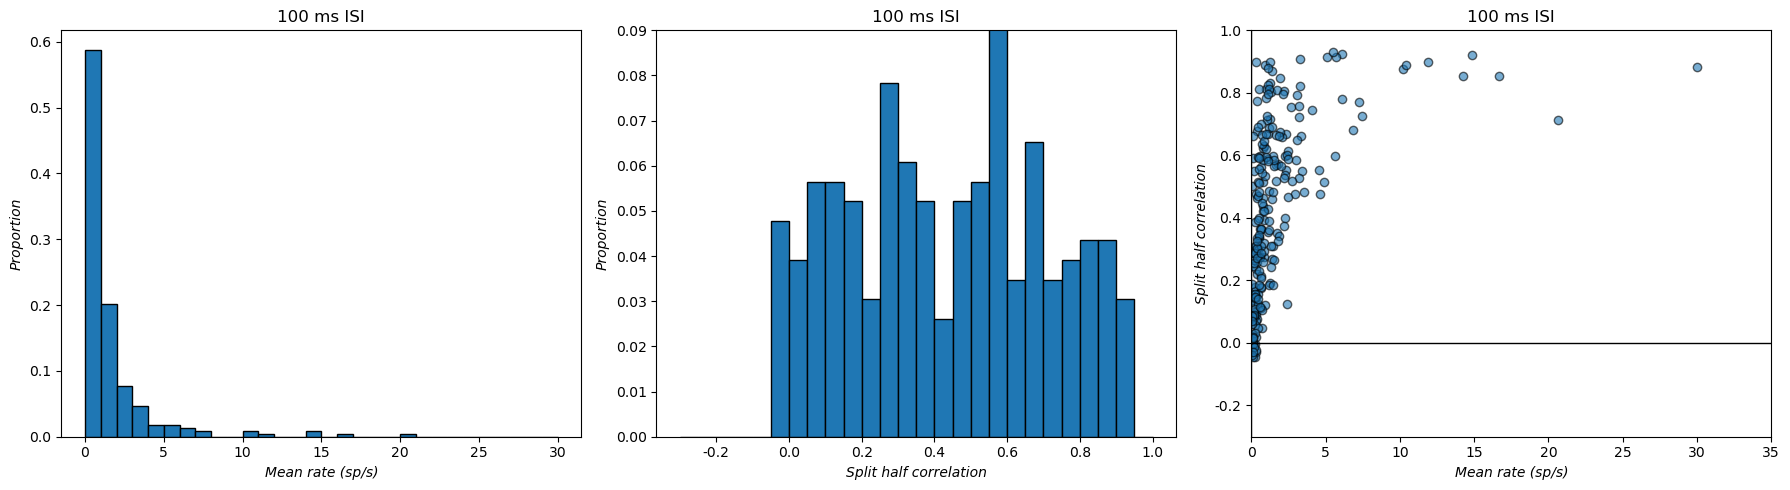

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

(1262,)
(1262,)


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

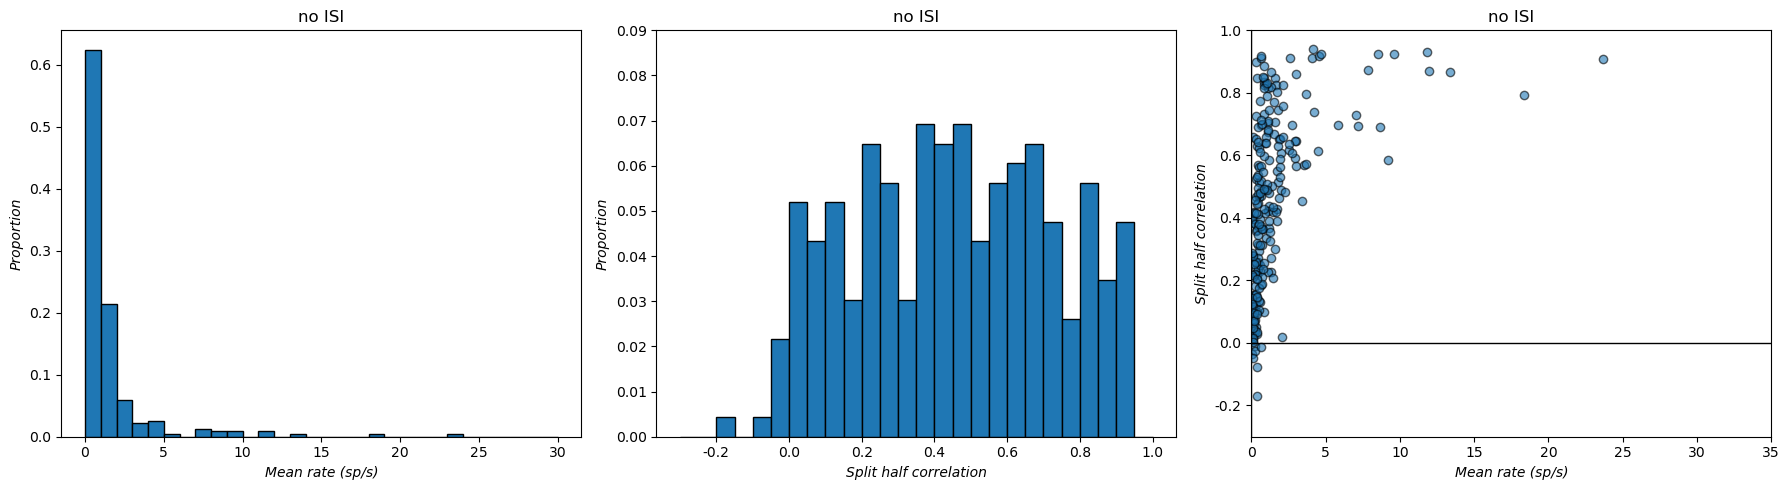

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

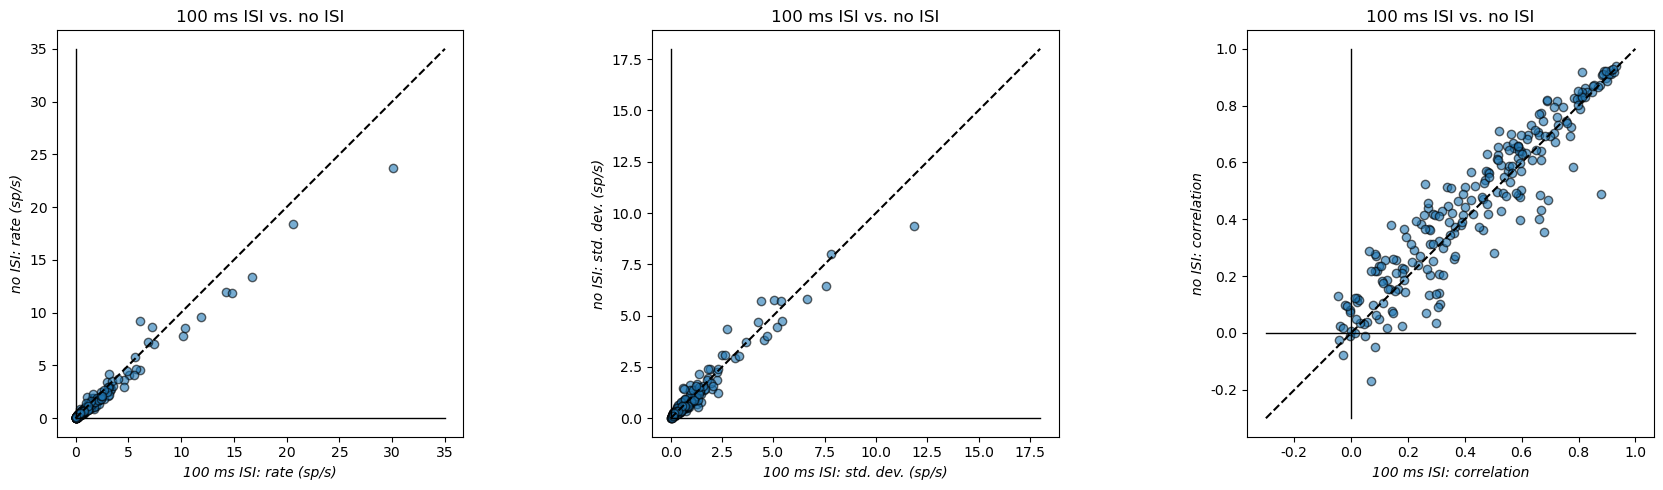

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

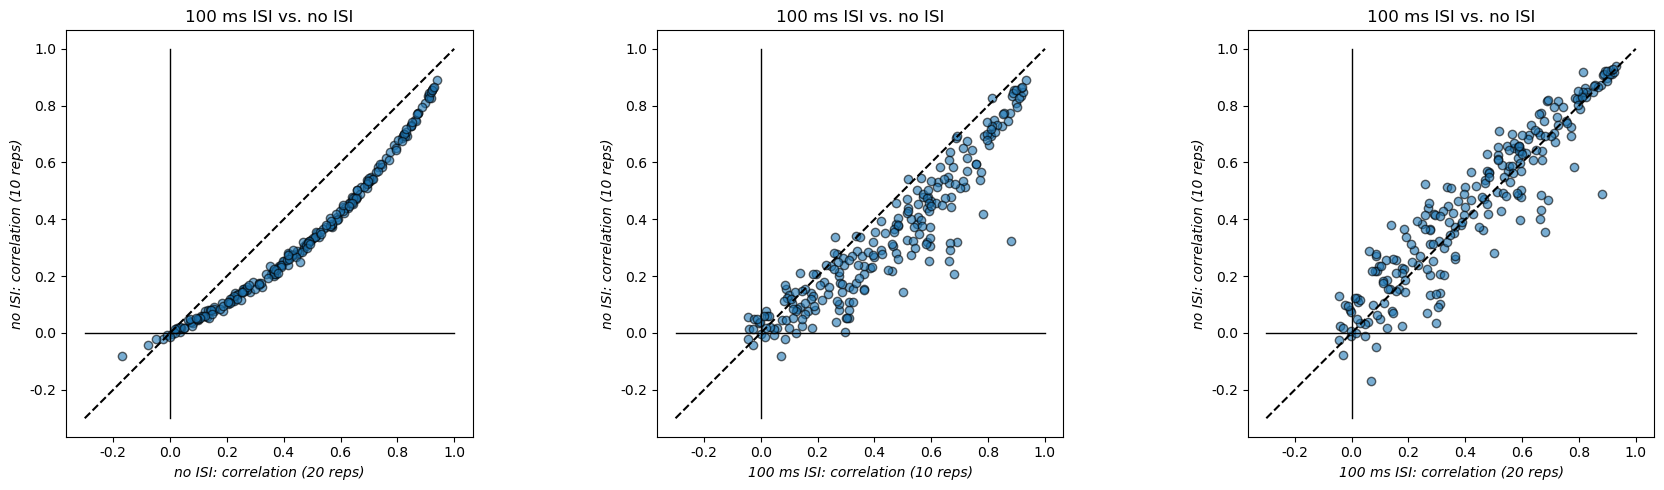

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['axes.unicode_minus'] = False

save_figure_path = r'C:\Users\justi\Dropbox\Figures\NaturalImagesV1V2\split_half'

block_name = np.array(['100 ms ISI', 'no ISI'])


area_ind_list = np.array(f['natImRateData']['cellInfo']['areaInd'])
sort_ind_list = np.array(f['natImRateData']['cellInfo']['sortInd'])

area_ind = 2
#sort_ind = 0 # good only
sort_ind = 1 # good & mua
#sort_ind = 2 # good, mua, and noise

sort_mask = sort_ind_list <= 1
area_mask = area_ind_list == area_ind
cell_mask = area_mask & sort_mask
cell_mask = cell_mask[0,:]

rate_axis_lim = [0, 35]
std_axis_lim = [0, 18]
corr_axis_lim = [-0.3, 1]
corr_hist_max = 0.09

#mean_correlations = np.mean(sample_correlations, axis=2)
mean_match_correlations = np.mean(sample_match_correlations, axis=2)
save_mean_rates = np.zeros((n_blocks, n_units))
save_mean_var = np.zeros((n_blocks, n_units))
for block_ind in range(n_blocks):
    block_ref = f['natImRateData']['block'][block_ind,0]
    block = f[block_ref]
    
    mean_rates = np.mean(block['testRates'][:, :, :], axis=(0, 1))
    save_mean_rates[block_ind, :] = mean_rates
    save_mean_var[block_ind, :] = np.var(np.mean(block['testRates'][:, :, :], axis=1),axis=0)

    this_correlations = mean_correlations[:,block_ind]




    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    # Histogram of mean rates
    rate_bin_edges = np.arange(0, 31)
    #axs[0].hist(mean_rates, bins=bin_edges, edgecolor='black', density=True)
    
    print(mean_rates.shape)
    print(cell_mask.shape)

    counts, bins = np.histogram(mean_rates[cell_mask], rate_bin_edges)
    proportions = counts / counts.sum()
    axs[0].bar(bins[:-1], proportions, width=np.diff(bins), edgecolor='black', align='edge')

    axs[0].set_xlabel('Mean rate (sp/s)', fontstyle='italic')
    axs[0].set_ylabel('Proportion', fontstyle='italic')
    axs[0].set_title(block_name[block_ind])

    # Split half correlation
    plot_ind = 1
    corr_bin_edges = np.linspace(-0.3, 1, 27)
    counts, bins = np.histogram(this_correlations[cell_mask], corr_bin_edges)
    proportions = counts / counts.sum()
    axs[plot_ind].bar(bins[:-1], proportions, width=np.diff(bins), edgecolor='black', align='edge')
    axs[plot_ind].set_xlabel('Split half correlation', fontstyle='italic')
    axs[plot_ind].set_ylabel('Proportion', fontstyle='italic')
    axs[plot_ind].set_title(block_name[block_ind])
    axs[plot_ind].set_ylim([0, corr_hist_max])

    # Scatter plot correlations vs mean rates
    plot_ind = 2
    axs[plot_ind].plot([0, 0], corr_axis_lim, 'k-', linewidth=1) # vertical line at x=0
    axs[plot_ind].plot(rate_axis_lim, [0, 0], 'k-', linewidth=1) # horizontal line at y=0
    axs[plot_ind].scatter(mean_rates[cell_mask], this_correlations[cell_mask], alpha=0.6, edgecolors='k')
    axs[plot_ind].set_xlabel('Mean rate (sp/s)', fontstyle='italic')
    axs[plot_ind].set_ylabel('Split half correlation', fontstyle='italic')
    axs[plot_ind].set_title(block_name[block_ind])
    axs[plot_ind].set_xlim(rate_axis_lim)
    axs[plot_ind].set_ylim(corr_axis_lim)
    
    plt.tight_layout()
    plt.savefig(save_figure_path + f'\\{block_name[block_ind]}_rate_and_split_half.png', dpi=300)
    plt.savefig(save_figure_path + f'\\{block_name[block_ind]}_rate_and_split_half.eps')
    plt.show()


fig, axs = plt.subplots(1, 3, figsize=(18, 5))

plot_ind = 0
axs[plot_ind].plot([0, 0], rate_axis_lim, 'k-', linewidth=1) # vertical line at x=0
axs[plot_ind].plot(rate_axis_lim, [0, 0], 'k-', linewidth=1) # horizontal line at y=0
axs[plot_ind].scatter(save_mean_rates[0,cell_mask], save_mean_rates[1,cell_mask], alpha=0.6, edgecolors='k')
axs[plot_ind].plot(rate_axis_lim, rate_axis_lim, 'k--')  # black dashed line from (0,0) to (1,1)

axs[plot_ind].set_xlim(rate_axis_lim)
axs[plot_ind].set_ylim(rate_axis_lim)
axs[plot_ind].axis('square')

axs[plot_ind].set_xlabel(block_name[0] + ': rate (sp/s)', fontstyle='italic')
axs[plot_ind].set_ylabel(block_name[1] + ': rate (sp/s)', fontstyle='italic')
axs[plot_ind].set_title(block_name[0] + ' vs. ' + block_name[1])


plot_ind = 1
axs[plot_ind].plot([0, 0], std_axis_lim, 'k-', linewidth=1) # vertical line at x=0
axs[plot_ind].plot(std_axis_lim, [0, 0], 'k-', linewidth=1) # horizontal line at y=0
axs[plot_ind].scatter(np.sqrt(save_mean_var[0,cell_mask]), np.sqrt(save_mean_var[1,cell_mask]), alpha=0.6, edgecolors='k')
axs[plot_ind].plot(std_axis_lim, std_axis_lim, 'k--')  # black dashed line from (0,0) to (1,1)

axs[plot_ind].set_xlim(std_axis_lim)
axs[plot_ind].set_ylim(std_axis_lim)
axs[plot_ind].axis('square')

axs[plot_ind].set_xlabel(block_name[0] + ': std. dev. (sp/s)', fontstyle='italic')
axs[plot_ind].set_ylabel(block_name[1] + ': std. dev. (sp/s)', fontstyle='italic')
axs[plot_ind].set_title(block_name[0] + ' vs. ' + block_name[1])


plot_ind = 2
axs[plot_ind].plot([0, 0], corr_axis_lim, 'k-', linewidth=1) # vertical line at x=0
axs[plot_ind].plot(corr_axis_lim, [0, 0], 'k-', linewidth=1) # horizontal line at y=0
axs[plot_ind].scatter(mean_correlations[cell_mask,0], mean_correlations[cell_mask,1], alpha=0.6, edgecolors='k')
axs[plot_ind].plot(corr_axis_lim, corr_axis_lim, 'k--')  # black dashed line from (0,0) to (1,1)

axs[plot_ind].set_xlim(corr_axis_lim)
axs[plot_ind].set_ylim(corr_axis_lim)
axs[plot_ind].axis('square')

axs[plot_ind].set_xlabel(block_name[0] + ': correlation', fontstyle='italic')
axs[plot_ind].set_ylabel(block_name[1] + ': correlation', fontstyle='italic')
axs[plot_ind].set_title(block_name[0] + ' vs. ' + block_name[1])

plt.tight_layout()
plt.savefig(save_figure_path + f'\\Compare_rate_and_split_half.png', dpi=300)
plt.savefig(save_figure_path + f'\\Compare_rate_and_split_half.eps')
plt.show()




fig, axs = plt.subplots(1, 3, figsize=(18, 5))


plot_ind = 0
axs[plot_ind].plot([0, 0], corr_axis_lim, 'k-', linewidth=1) # vertical line at x=0
axs[plot_ind].plot(corr_axis_lim, [0, 0], 'k-', linewidth=1) # horizontal line at y=0
axs[plot_ind].scatter(mean_correlations[cell_mask,1], mean_match_correlations[cell_mask,0], alpha=0.6, edgecolors='k')
axs[plot_ind].plot(corr_axis_lim, corr_axis_lim, 'k--')  # black dashed line from (0,0) to (1,1)

axs[plot_ind].set_xlim(corr_axis_lim)
axs[plot_ind].set_ylim(corr_axis_lim)
axs[plot_ind].axis('square')

axs[plot_ind].set_xlabel(block_name[1] + ': correlation (20 reps)', fontstyle='italic')
axs[plot_ind].set_ylabel(block_name[1] + ': correlation (10 reps)', fontstyle='italic')
axs[plot_ind].set_title(block_name[0] + ' vs. ' + block_name[1])


plot_ind = 1
axs[plot_ind].plot([0, 0], corr_axis_lim, 'k-', linewidth=1) # vertical line at x=0
axs[plot_ind].plot(corr_axis_lim, [0, 0], 'k-', linewidth=1) # horizontal line at y=0
axs[plot_ind].scatter(mean_correlations[cell_mask,0], mean_match_correlations[cell_mask,0], alpha=0.6, edgecolors='k')
axs[plot_ind].plot(corr_axis_lim, corr_axis_lim, 'k--')  # black dashed line from (0,0) to (1,1)

axs[plot_ind].set_xlim(corr_axis_lim)
axs[plot_ind].set_ylim(corr_axis_lim)
axs[plot_ind].axis('square')

axs[plot_ind].set_xlabel(block_name[0] + ': correlation (10 reps)', fontstyle='italic')
axs[plot_ind].set_ylabel(block_name[1] + ': correlation (10 reps)', fontstyle='italic')
axs[plot_ind].set_title(block_name[0] + ' vs. ' + block_name[1])


plot_ind = 2
axs[plot_ind].plot([0, 0], corr_axis_lim, 'k-', linewidth=1) # vertical line at x=0
axs[plot_ind].plot(corr_axis_lim, [0, 0], 'k-', linewidth=1) # horizontal line at y=0
axs[plot_ind].scatter(mean_correlations[cell_mask,0], mean_correlations[cell_mask,1], alpha=0.6, edgecolors='k')
axs[plot_ind].plot(corr_axis_lim, corr_axis_lim, 'k--')  # black dashed line from (0,0) to (1,1)


axs[plot_ind].set_xlim(corr_axis_lim)
axs[plot_ind].set_ylim(corr_axis_lim)
axs[plot_ind].axis('square')

axs[plot_ind].set_xlabel(block_name[0] + ': correlation (20 reps)', fontstyle='italic')
axs[plot_ind].set_ylabel(block_name[1] + ': correlation (10 reps)', fontstyle='italic')
axs[plot_ind].set_title(block_name[0] + ' vs. ' + block_name[1])

plt.tight_layout()
plt.savefig(save_figure_path + f'\\Compare_reps_split_half.png', dpi=300)
plt.savefig(save_figure_path + f'\\Compare_reps_split_half.eps')
plt.show()
